# Mínimos cuadrados lineales
**Nota:** Los siguientes ejercicios están basados en las notas de clase disponibles en: https://github.com/ITAM-DS/Propedeutico/blob/master/Python/clases/3_algebra_lineal/3_minimos_cuadrados.ipynb

## Ejercicio 5:
Consulta la página del INEGI para obtener los datos de la población total de México en los años de 1950 a 2010 (cada 10 años) y ajusta modelos polinomiales de grados: 1, 3, 6 y spline's cúbicos. Realiza una gráfica que involucre los datos y las curvas de cada modelo. Estima la población en los años 1940, 1995 y 2020 para cada modelo y calcula tu error de estimación si la población en México en 1940 era de 19,653,552 y en 1995 de 91,158,290. Compara tu estimación para 2020 con los datos de 2018.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import pprint
np.set_printoptions(precision = 4)

In [2]:
mat_mex = np.loadtxt('poblacion_inegi.txt', skiprows=1)
pprint.pprint(mat_mex)
año = mat_mex[:, 0]
pob = mat_mex[:, 1]

pobs_1940 = 19653552 
pobs_1995 = 91158290
pobs_2018 = 124738000 # No son datos INEGI. Fuente: https://datosmacro.expansion.com/demografia/poblacion/mexico         

array([[1.9500e+03, 2.5791e+07],
       [1.9600e+03, 3.4923e+07],
       [1.9700e+03, 4.8225e+07],
       [1.9800e+03, 6.6847e+07],
       [1.9900e+03, 8.1250e+07],
       [2.0000e+03, 9.7483e+07],
       [2.0100e+03, 1.1234e+08]])


Dado que son polinomios de grado n, podemos usar la función polyfit de numpy.

### Modelo polinomial de grado 1

In [3]:
ngrado_m1 = 1
coef_m1 = np.polyfit(año, pob, ngrado_m1)
y_mod1 = (coef_m1[1]*(año**0) + 
          coef_m1[0]*(año**1))

In [4]:
# Elementos de formato para gráficas
ejey = np.arange(0.2e8, 1.4e8, step=0.2e8)
ejey_list = ['20M', '40M', '60M', '80M', '100M', '120M']

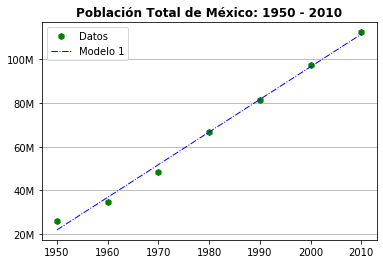

--------------------------------
Modelo 1: Polinomio con 1 grados
--------------------------------
poblacion = 
1492076.91*año^1
-2887618602.86*año^0
--------------------------------
------------------------------------------
Estimación de la población total en México
------------------------------------------
1940: 7.01M
1995: 89.07M
2020: 126.38M
------------------------------------------
---------------------
Errores de estimación
---------------------
1940: 12.64M
1995: 2.08M
2018vs2020(est) :-1.64M
---------------------


In [21]:
# Gráfica
plt.yticks(ticks=ejey, labels=ejey_list)
plt.plot(año, pob,'gh')
plt.plot(año, y_mod1,'b-.', linewidth=1.0)
plt.legend(('Datos', 'Modelo 1'), loc='best')
plt.title('Población Total de México: 1950 - 2010', fontweight="bold")
plt.gca().yaxis.grid(True) # líneas hs en los ejes

plt.show()

# Tabla del modelo:
index_coef_m1 = np.arange(ngrado_m1, -1, -1)
tab_mod1_str = str(f"Modelo 1: Polinomio con {ngrado_m1} grados")
print('-'*len(tab_mod1_str)); print(tab_mod1_str); print('-'*len(tab_mod1_str)); 
print('poblacion = ')
for a, b in zip(index_coef_m1, coef_m1):
    print(f"{'{0:.2f}'.format(b)}*año^{a}")
print('-'*len(tab_mod1_str))
          
# Tabla de estimaciones
m1_1940 = np.polyval(coef_m1, 1940)
m1_1995 = np.polyval(coef_m1, 1995)
m1_2020 = np.polyval(coef_m1, 2020)
                   
est_mod1_str = str('Estimación de la población total en México')
print('-'*len(est_mod1_str)); print(est_mod1_str); print('-'*len(est_mod1_str)); 
print(f"1940: {'{0:.2f}'.format(m1_1940/1e6)}M")
print(f"1995: {'{0:.2f}'.format(m1_1995/1e6) }M")
print(f"2020: {'{0:.2f}'.format(m1_2020/1e6) }M")
print('-'*len(est_mod1_str))  
      
# Tabla de Errores de estimación
errs_str = str('Errores de estimación')
print('-'*len(errs_str)); print(errs_str); print('-'*len(errs_str)); 
print(f"1940: {'{0:.2f}'.format((pobs_1940-m1_1940)/1e6)}M")
print(f"1995: {'{0:.2f}'.format((pobs_1995-m1_1995)/1e6) }M")
print(f"2018vs2020(est) :{'{0:.2f}'.format((pobs_2018-m1_2020)/1e6) }M")
print('-'*len(errs_str)) 

### Modelo polinomial de grado 3

In [6]:
ngrado_m2 = 3
coef_m2 = np.polyfit(año, pob, ngrado_m2)
y_mod2 = (coef_m2[3] +
          coef_m2[2]*año + 
          coef_m2[1]*(año**2) + 
          coef_m2[0]*(año**3))

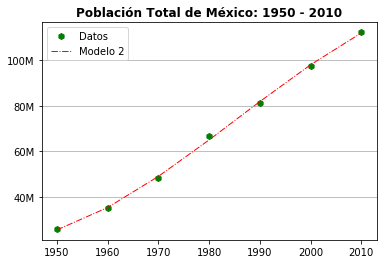

--------------------------------
Modelo 2: Polinomio con 3 grados
--------------------------------
poblacion = 
-251.09*año^3
1495608.81*año^2
-2967846549.00*año^1
1962060109318.68*año^0
--------------------------------
------------------------------------------
Estimación de la población total en México
------------------------------------------
1940: 21.02M
1995: 90.14M
2020: 122.31M
------------------------------------------
---------------------
Errores de estimación
---------------------
1940: -1.37M
1995: 1.02M
2018vs2020(est) :2.43M
---------------------


In [12]:
# Gráfica
plt.yticks(ticks=ejey, labels=ejey_list)
plt.plot(año, pob,'gh')
plt.plot(año, y_mod2,'r-.', linewidth=1.0)
plt.legend(('Datos', 'Modelo 2'), loc='best')
plt.title('Población Total de México: 1950 - 2010', fontweight="bold")
plt.gca().yaxis.grid(True)
plt.show()

# Tabla del modelo:
index_coef_m2 = np.arange(ngrado_m2, -1, -1)
tab_mod2_str = str(f"Modelo 2: Polinomio con {ngrado_m2} grados")
print('-'*len(tab_mod2_str)); print(tab_mod2_str); print('-'*len(tab_mod2_str)); 
print('poblacion = ')
for a, b in zip(index_coef_m2, coef_m2):
    print(f"{'{0:.2f}'.format(b)}*año^{a}")
print('-'*len(tab_mod1_str))
          
# Tabla de Estimaciones
m2_1940 = np.polyval(coef_m2, 1940)
m2_1995 = np.polyval(coef_m2, 1995)
m2_2020 = np.polyval(coef_m2, 2020)
                   
est_mod2_str = str('Estimación de la población total en México')
print('-'*len(est_mod2_str)); print(est_mod1_str); print('-'*len(est_mod2_str)); 
print(f"1940: {'{0:.2f}'.format(m2_1940/1e6)}M")
print(f"1995: {'{0:.2f}'.format(m2_1995/1e6) }M")
print(f"2020: {'{0:.2f}'.format(m2_2020/1e6) }M")
print('-'*len(est_mod2_str))  
      
# Errores de estimación
errs_str = str('Errores de estimación')
print('-'*len(errs_str)); print(errs_str); print('-'*len(errs_str)); 
print(f"1940: {'{0:.2f}'.format((pobs_1940-m2_1940)/1e6)}M")
print(f"1995: {'{0:.2f}'.format((pobs_1995-m2_1995)/1e6) }M")
print(f"2018vs2020(est) :{'{0:.2f}'.format((pobs_2018-m2_2020)/1e6) }M")
print('-'*len(errs_str))

### Modelo polinomial de grado 6

In [14]:
ngrado_m3 = 6
coef_m3 = np.polyfit(año, pob, ngrado_m3)
y_mod3 = (coef_m3[6]*(año**0) +
          coef_m3[5]*(año**1) + 
          coef_m3[4]*(año**2) + 
          coef_m3[3]*(año**3) +
          coef_m3[2]*(año**4) +
          coef_m3[1]*(año**5) +
          coef_m3[0]*(año**6))

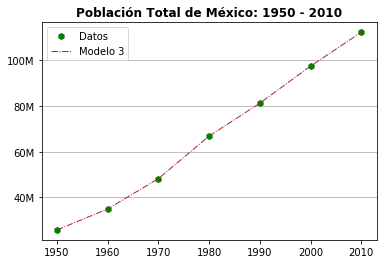

--------------------------------
Modelo 3: Polinomio con 6 grados
--------------------------------
poblacion = 
-0.07*año^6
840.17*año^5
-4159029.45*año^4
10980093958.35*año^3
-16305427162988.09*año^2
12913577071181062.00*año^1
-4261271546477308928.00*año^0
--------------------------------
------------------------------------------
Estimación de la población total en México
------------------------------------------
1940: -68.24M
1995: 88.49M
2020: 37.67M
------------------------------------------
---------------------
Errores de estimación
---------------------
1940: 87.89803M
1995: 2.66472M
2018vs2020(est): 87.06965M
---------------------


In [22]:
# Gráfica
plt.yticks(ticks=ejey, labels=ejey_list)
plt.plot(año, pob,'gh')
plt.plot(año, y_mod3,'-.', color='brown', linewidth=1.0)
plt.legend(('Datos', 'Modelo 3'), loc='best')
plt.title('Población Total de México: 1950 - 2010', fontweight="bold")
plt.gca().yaxis.grid(True)

plt.show()

# Tabla del modelo:
index_coef_m3 = np.arange(ngrado_m3, -1, -1)
tab_mod3_str = str(f"Modelo 3: Polinomio con {ngrado_m3} grados")
print('-'*len(tab_mod2_str)); print(tab_mod3_str); print('-'*len(tab_mod3_str)); 
print('poblacion = ')
for a, b in zip(index_coef_m3, coef_m3):
    print(f"{'{0:.2f}'.format(b)}*año^{a}")
print('-'*len(tab_mod1_str))
          
# Tabla de Estimaciones
m3_1940 = np.polyval(coef_m3, 1940)
m3_1995 = np.polyval(coef_m3, 1995)
m3_2020 = np.polyval(coef_m3, 2020)
                   
est_mod3_str = str('Estimación de la población total en México')
print('-'*len(est_mod3_str)); print(est_mod1_str); print('-'*len(est_mod3_str)); 
print(f"1940: {'{0:.2f}'.format(m3_1940/1e6)}M")
print(f"1995: {'{0:.2f}'.format(m3_1995/1e6)}M")
print(f"2020: {'{0:.2f}'.format(m3_2020/1e6)}M")
print('-'*len(est_mod3_str))  
      
# Errores de estimación
errs_str = str('Errores de estimación')
print('-'*len(errs_str)); print(errs_str); print('-'*len(errs_str)); 
print(f"1940: {'{0:.5f}'.format((pobs_1940-m3_1940)/1e6)}M")
print(f"1995: {'{0:.5f}'.format((pobs_1995-m3_1995)/1e6)}M")
print(f"2018vs2020(est): {'{0:.5f}'.format((pobs_2018-m3_2020)/1e6)}M")
print('-'*len(errs_str))

### Spline cúbico

In [18]:
from scipy.interpolate import interp1d
y_mod4 = interp1d(año, pob, kind = 'cubic', fill_value='extrapolate')
yeval = y_mod4(año)

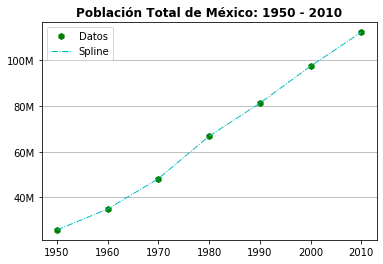

------------------------------------------
Estimación de la población total en México
------------------------------------------
1940: 15.54M
1995: 89.10M
2020: 118.81M
------------------------------------------
---------------------
Errores de estimación
---------------------
1940: 4.12M
1995: 2.06M
2018vs2020(est): 5.93M
---------------------


In [23]:
# Gráfica
plt.yticks(ticks=ejey, labels=ejey_list)
plt.plot(año, pob,'gh')
plt.plot(año, yeval,'c-.', linewidth=1.0)
plt.legend(('Datos', 'Spline'), loc='best')
plt.title('Población Total de México: 1950 - 2010', fontweight="bold")
plt.gca().yaxis.grid(True)

plt.show()

# Tabla de Estimaciones
m4_1940, m4_1995, m4_2020 = y_mod4([1940, 1995, 2020])
                   
est_mod4_str = str('Estimación de la población total en México')
print('-'*len(est_mod4_str)); print(est_mod1_str); print('-'*len(est_mod4_str)); 
print(f"1940: {'{0:.2f}'.format(m4_1940/1e6)}M")
print(f"1995: {'{0:.2f}'.format(m4_1995/1e6)}M")
print(f"2020: {'{0:.2f}'.format(m4_2020/1e6)}M")
print('-'*len(est_mod4_str))  
      
# Errores de estimación
errs_str = str('Errores de estimación')
print('-'*len(errs_str)); print(errs_str); print('-'*len(errs_str)); 
print(f"1940: {'{0:.2f}'.format((pobs_1940-m4_1940)/1e6)}M")
print(f"1995: {'{0:.2f}'.format((pobs_1995-m4_1995)/1e6) }M")
print(f"2018vs2020(est): {'{0:.2f}'.format((pobs_2018-m4_2020)/1e6)}M")
print('-'*len(errs_str))